In [1]:
import sys
sys.path.append("../util/")

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def k_means(dataset, k):
    #minX = np.amin(dataset, axis=0)
    #maxX = np.amax(dataset, axis=0)
    #centroids = np.array([minX + np.multiply(np.subtract(maxX, minX), np.random.rand(dataset.shape[1])) for i in range(k)])
    centroids= dataset[np.random.choice(dataset.shape[0], k)]
    isChanged = True
    clusterInfo = -np.ones((dataset.shape[0], 2))
    while isChanged:
        isChanged = False
        for i in range(dataset.shape[0]):
            minDist = np.inf
            index = -1
            for j in range(k):
                distance = np.linalg.norm(np.subtract(dataset[i], centroids[j]))
                if (distance<minDist):
                    minDist = distance
                    index = j
            if (clusterInfo[i, 0]!=index):
                clusterInfo[i, 0] = index
                isChanged = True
        for i in range(k):
            centroids[i] = np.mean(dataset[np.nonzero(clusterInfo[:,0]==i)], axis=0)
    for i in range(k):
        clusterInfo[np.nonzero(clusterInfo[:,0]==i), 1] = np.linalg.norm(np.subtract(dataset[np.nonzero(clusterInfo[:,0]==i)], centroids[i]), axis=1)
    return centroids, clusterInfo

In [3]:
def bisecting_k_means(dataset, k):
    centroids = np.empty((k, dataset.shape[1]))
    clusterInfo = np.zeros((dataset.shape[0], 2))
    centroids[0] = np.mean(dataset, axis=0)
    clusterInfo[:, 1] = np.linalg.norm(np.subtract(dataset, centroids[0]), axis=1)
    for currClusterNum in range(1, k):
        lowestSSE = np.sum(clusterInfo[:,1])
        for i in range(currClusterNum):
            c, info = k_means(dataset[np.nonzero(clusterInfo[:, 0]==i)], 2)
            sseSplit = np.sum(info[:,1])
            sseNotSplit = np.sum(clusterInfo[np.nonzero(clusterInfo[:, 0]!=i),1])
            #print(sseSplit, info, lowestSSE, clusterInfo)
            if ((sseSplit+sseNotSplit)<lowestSSE):
                lowestSSE = sseSplit+sseNotSplit
                bestCentToSplit = i
                bestNewCents = c
                bestClustAss = info.copy()
        centroids[bestCentToSplit] = bestNewCents[0,:]
        centroids[currClusterNum] = bestNewCents[1,:]
        bestClustAss[np.nonzero(bestClustAss[:,0]==1),0] = currClusterNum
        bestClustAss[np.nonzero(bestClustAss[:,0]==0),0] = bestCentToSplit
        clusterInfo[np.nonzero(clusterInfo[:,0] == bestCentToSplit)]= bestClustAss
    return centroids, clusterInfo

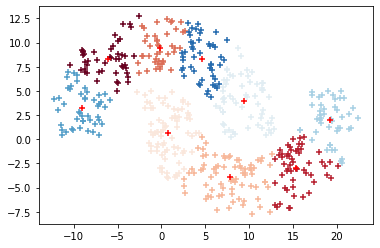

In [4]:
if __name__ == "__main__":
    from ipynb.fs.full.data_generator_2d import double_moon
    dataset = double_moon(500, d=-5)
    np.random.shuffle(dataset)
    k=9
    c, info = bisecting_k_means(dataset[:,:2], k)
    fig = plt.figure()
    ax = fig.subplots(1, 1)
    ax.scatter(dataset[:,0], dataset[:,1], color=plt.cm.RdBu(info[:,0]/k), marker="+")
    ax.scatter(c[:,0],c[:,1], color="r", marker="+")
    plt.show()